In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('ultimate_dataset.csv')
df

,url,timestamp,processed_url_text,newspaper,arquivo_url,title,authors,publish_date,text,Unnamed: 0,Lemmas,Lemma_String
0,https://www.cmjornal.pt/politica/amp/andre-ven...,20200124190851,andre ventura do chega quer camaras nas fardas...,cmjornal.pt/,https://arquivo.pt/wayback/20200124190851/http...,André Ventura do Chega quer câmaras nas fardas...,[],NaN,O partido Chega apresentou um projeto de resol...,NaN,"['partido', 'chega', 'apresentar', 'projeto', ...",partido chega apresentar projeto resolução def...
1,https://www.cmjornal.pt/politica/amp/aprovada-...,20200203181044,aprovada proposta do chega para divulgar finan...,cmjornal.pt/,https://arquivo.pt/wayback/20200203181044/http...,Aprovada proposta do Chega para divulgar finan...,[],NaN,A proposta do Chega para que seja pública a li...,NaN,"['proposta', 'chega', 'público', 'lista', 'fin...",proposta chega público lista financiamento ver...
2,https://www.cmjornal.pt/politica/amp/aprovado-...,20200206190139,aprovado voto do chega para condenar agressoes...,cmjornal.pt/,https://arquivo.pt/wayback/20200206190139/http...,Aprovado voto do Chega para condenar agressões...,[],NaN,"Dos cinco votos apresentados hoje pelo Chega, ...",NaN,"['voto', 'apresentar', 'hoje', 'chega', 'aprov...",voto apresentar hoje chega aprovação plenário ...
3,https://www.cmjornal.pt/politica/amp/comissao-...,20200227012044,comissao diz que projeto de castracao quimica ...,cmjornal.pt/,https://arquivo.pt/wayback/20200227012044/http...,Comissão diz que projeto de castração química ...,[],NaN,A Comissão de Assuntos Constitucionais decidiu...,NaN,"['comissão', 'assuntos', 'constitucionais', 'd...",comissão assuntos constitucionais decidir segu...
4,https://www.cmjornal.pt/politica/amp/lei-do-ch...,20200210190432,lei do chega da castracao quimica e inconstitu...,cmjornal.pt/,https://arquivo.pt/wayback/20200210190432/http...,Lei do Chega da castração química é inconstitu...,[],NaN,Lei do Chega da castração química é inconstitu...,NaN,"['lei', 'chega', 'castração', 'químico', 'inco...",lei chega castração químico inconstitucional a...
...,...,...,...,...,...,...,...,...,...,...,...,...
3312,https://www.sapo.pt/rd/andre-ventura-da-carta-...,20220502182606,andre ventura da carta branca a jose pacheco,sapo.pt/,https://arquivo.pt/noFrame/replay/202205021826...,NaN,NaN,NaN,"Porque todos, de Norte a Sul, do Litoral ao In...",827.0,"['norte', 'sul', 'litoral', 'interior', 'dever...",norte sul litoral interior dever oportunidade ...
3313,https://www.sapo.pt/rd/andre-ventura-nao-vou-d...,20220919190529,andre ventura nao vou desistir ate ser,sapo.pt/,https://arquivo.pt/noFrame/replay/202209191905...,NaN,NaN,NaN,"Porque todos, de Norte a Sul, do Litoral ao In...",828.0,"['norte', 'sul', 'litoral', 'interior', 'dever...",norte sul litoral interior dever oportunidade ...
3314,https://www.sapo.pt/rd/chega-fest-partido-de-a...,20220514192031,chega fest partido de andre ventura,sapo.pt/,https://arquivo.pt/noFrame/replay/202205141920...,NaN,NaN,NaN,"Porque todos, de Norte a Sul, do Litoral ao In...",829.0,"['norte', 'sul', 'litoral', 'interior', 'dever...",norte sul litoral interior dever oportunidade ...
3315,https://visao.pt/atualidade/politica/legislati...,20240325090314,2024 03 01 o ergue te e de extrema direita e d...,visao.pt/,https://arquivo.pt/noFrame/replay/202403250903...,NaN,NaN,NaN,O Ergue-te (ex-PNR) caiu com estrondo com a ch...,830.0,"['ergue-te', 'ex-pnr', 'cair', 'estrondo', 'ch...",ergue-te ex-pnr cair estrondo chegada chega vi...


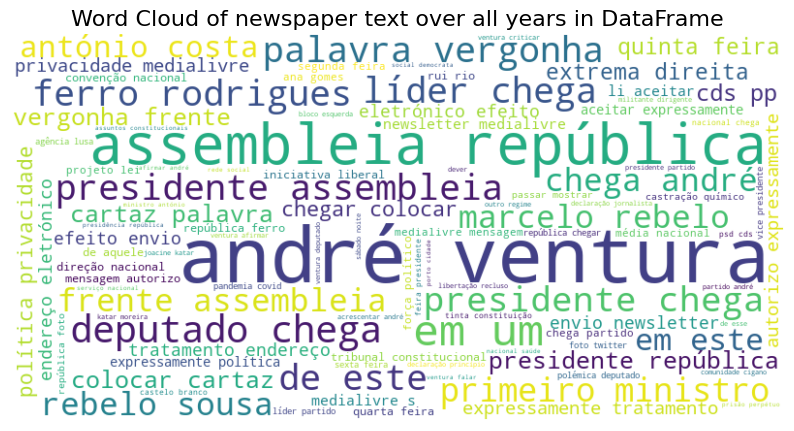

In [3]:
# Combine all text into a single string for the word cloud, is used in the other cells too
combined_text = ' '.join(df['Lemma_String'].dropna())  # Drop NaN values if present

# Create the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    contour_width=3,
    contour_color='steelblue'
).generate(combined_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axes
plt.title("Word Cloud of newspaper text over all years in DataFrame", fontsize=16)
plt.savefig('/Users/hannes_seidl/Desktop/UA_Aveiro/WS24:25/FDS/FDS_project_pics/wc_all_years')
plt.show()

/Users/hannes_seidl/Desktop/UA_Aveiro/WS24:25/FDS/FDS_project_pics/wc_year_2019


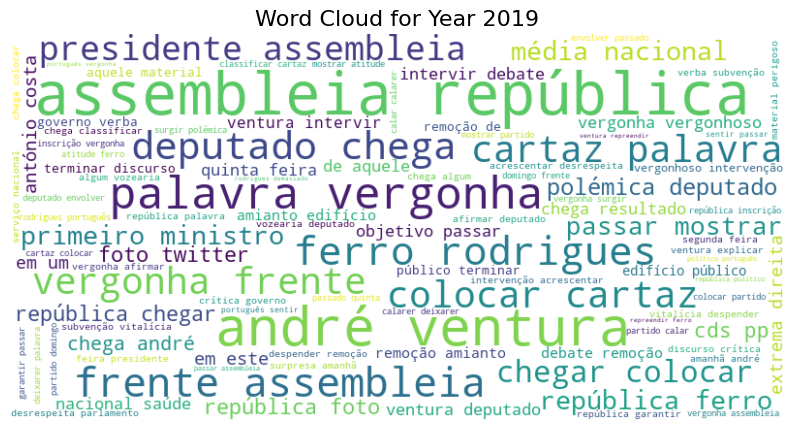

/Users/hannes_seidl/Desktop/UA_Aveiro/WS24:25/FDS/FDS_project_pics/wc_year_2020


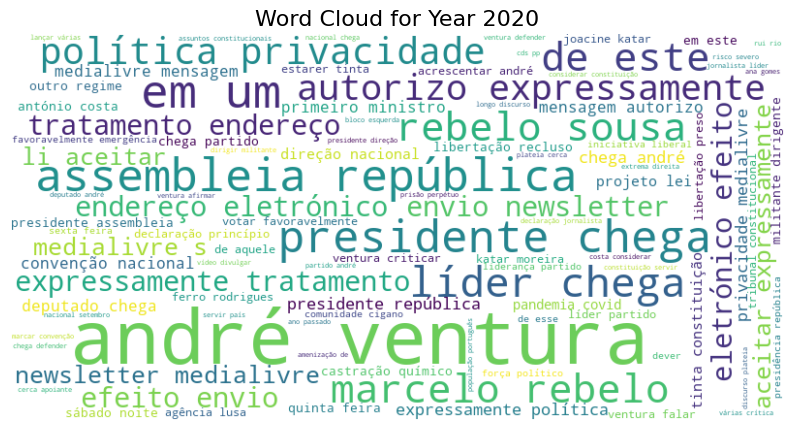

/Users/hannes_seidl/Desktop/UA_Aveiro/WS24:25/FDS/FDS_project_pics/wc_year_2021


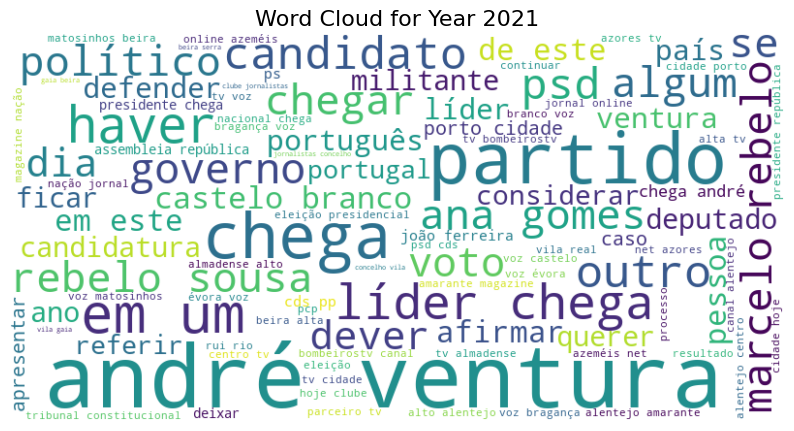

/Users/hannes_seidl/Desktop/UA_Aveiro/WS24:25/FDS/FDS_project_pics/wc_year_2022


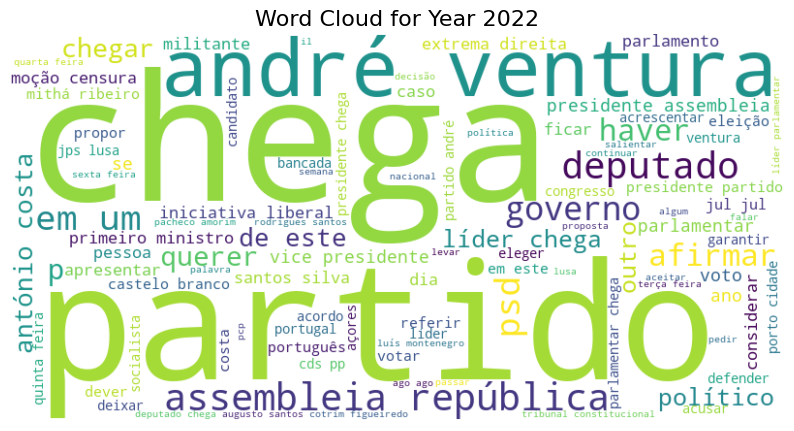

/Users/hannes_seidl/Desktop/UA_Aveiro/WS24:25/FDS/FDS_project_pics/wc_year_2023


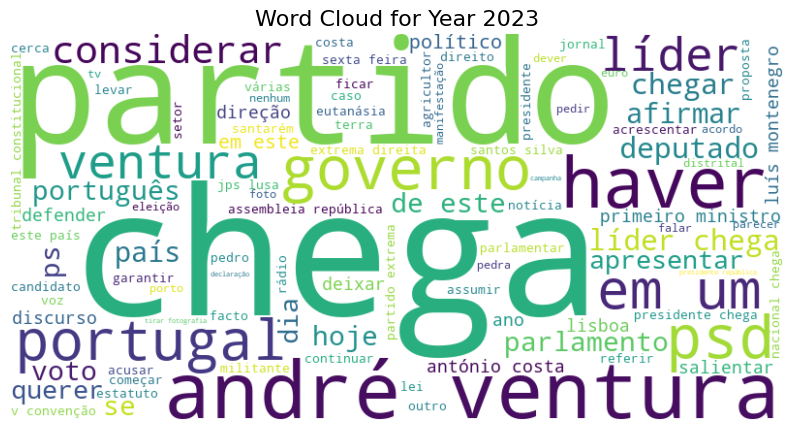

/Users/hannes_seidl/Desktop/UA_Aveiro/WS24:25/FDS/FDS_project_pics/wc_year_2024


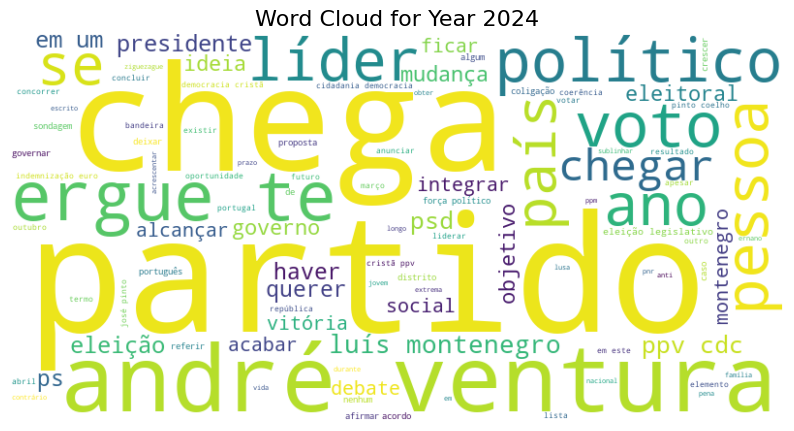

In [4]:
def generate_yearly_wordclouds(df, text_column='Lemma_String', timestamp_column='timestamp'):
    """
    Generate and display word clouds for each year present in the DataFrame.
    
    Parameters:
        df (DataFrame): The pandas DataFrame containing the data.
        text_column (str): The column containing text data for word clouds.
        timestamp_column (str): The column containing timestamps from which years are extracted.
    """
    # Extract the year from the timestamp column
    df['year'] = df[timestamp_column].astype(str).str[:4]
    
    # Sorting DataFrame by years
    df = df.sort_values('year')

    # Get unique years in the DataFrame
    unique_years = df['year'].unique()
    
    # Loop through each year and generate a word cloud
    for year in unique_years:
        # Filter rows for the current year
        year_df = df[df['year'] == year]
        
        # Combine all text for current year in string
        combined_text = ' '.join(year_df[text_column].dropna())

        # Generate the word cloud
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='white',
            max_words=100,
            contour_width=3,
            contour_color='steelblue'
        ).generate(combined_text)
        
        # Create filename for saving
        filename = f"/Users/hannes_seidl/Desktop/UA_Aveiro/WS24:25/FDS/FDS_project_pics/wc_year_{year}"
        print(filename)

        # Plot the word cloud
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')  # Turn off axes
        plt.title(f"Word Cloud for Year {year}", fontsize=16)
        plt.savefig(fname=filename)
        plt.show()
        
generate_yearly_wordclouds(df, text_column='Lemma_String', timestamp_column='timestamp')

[('chega', 6613), ('ventura', 5810), ('partido', 4931), ('andré', 4649), ('deputado', 3173), ('república', 3144), ('presidente', 3056), ('assembleia', 2377), ('em', 2044), ('haver', 2036)]


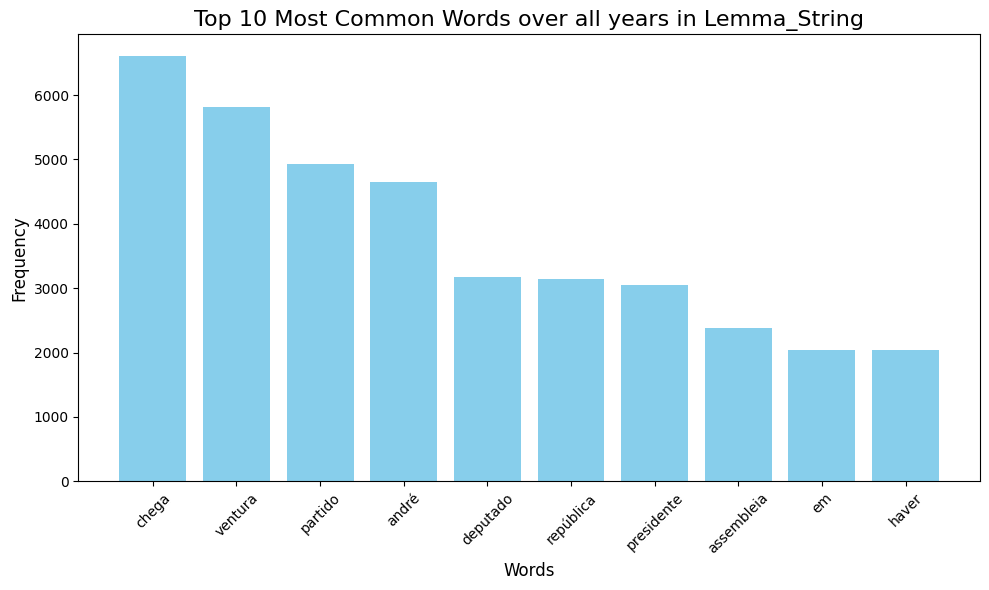

In [5]:
# Split the combined text into words
all_words = combined_text.split()

# Count the frequency of each word
word_counts = Counter(all_words)

# Get the 10 most common words
most_common_words = word_counts.most_common(10)
print(most_common_words)  # Print for debugging

# Separate words and their frequencies
words, frequencies = zip(*most_common_words)

# Plot the top 10 most common words
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.title("Top 10 Most Common Words over all years in Lemma_String", fontsize=16)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/Users/hannes_seidl/Desktop/UA_Aveiro/WS24:25/FDS/FDS_project_pics/most_common_words_all_years')
plt.show()

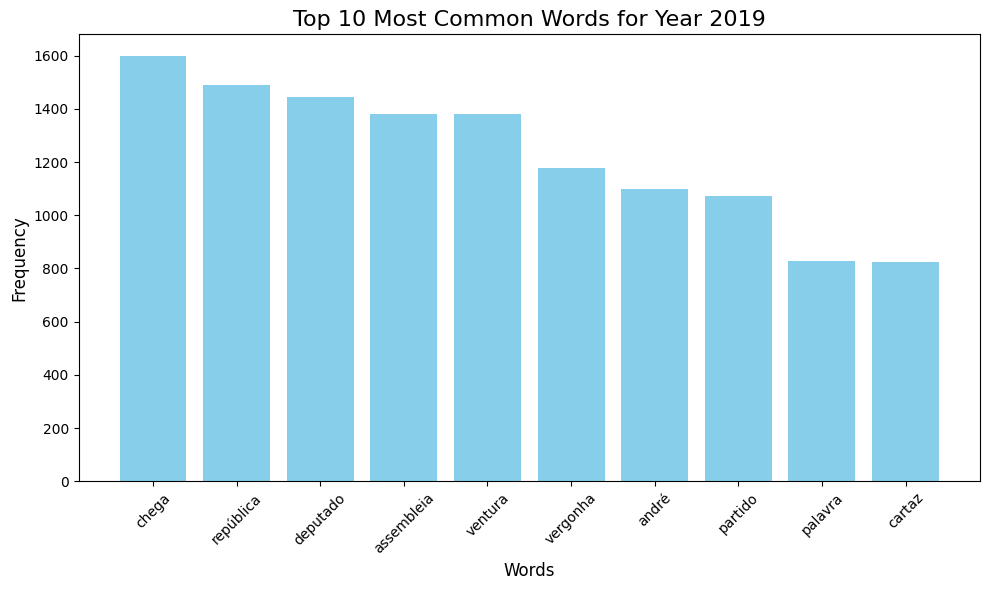

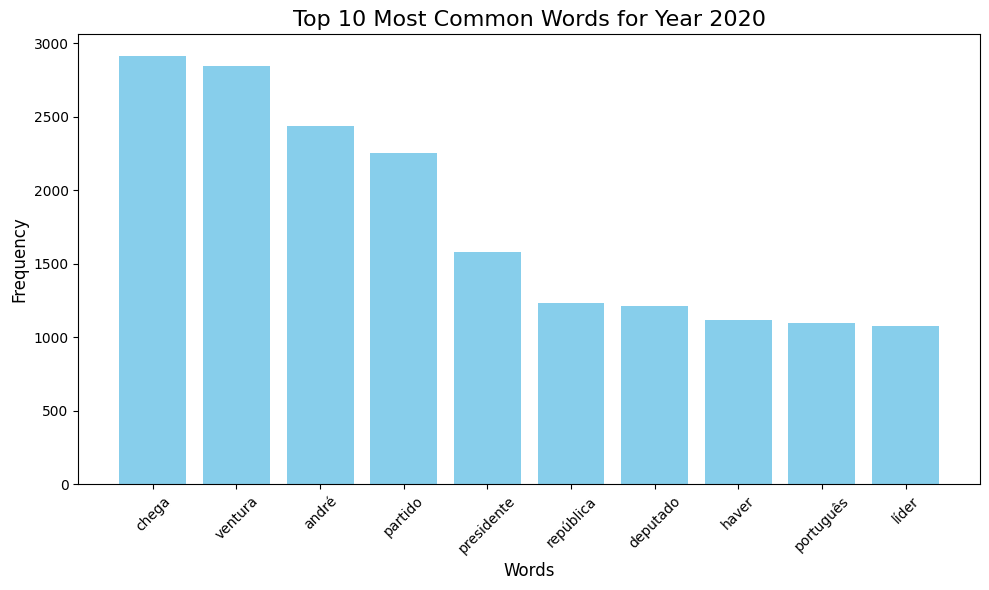

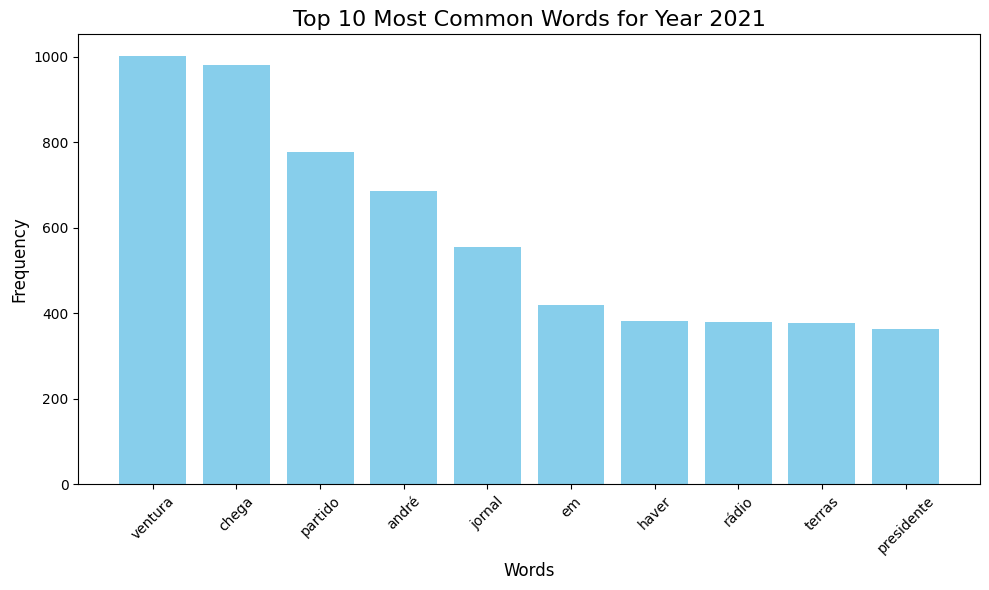

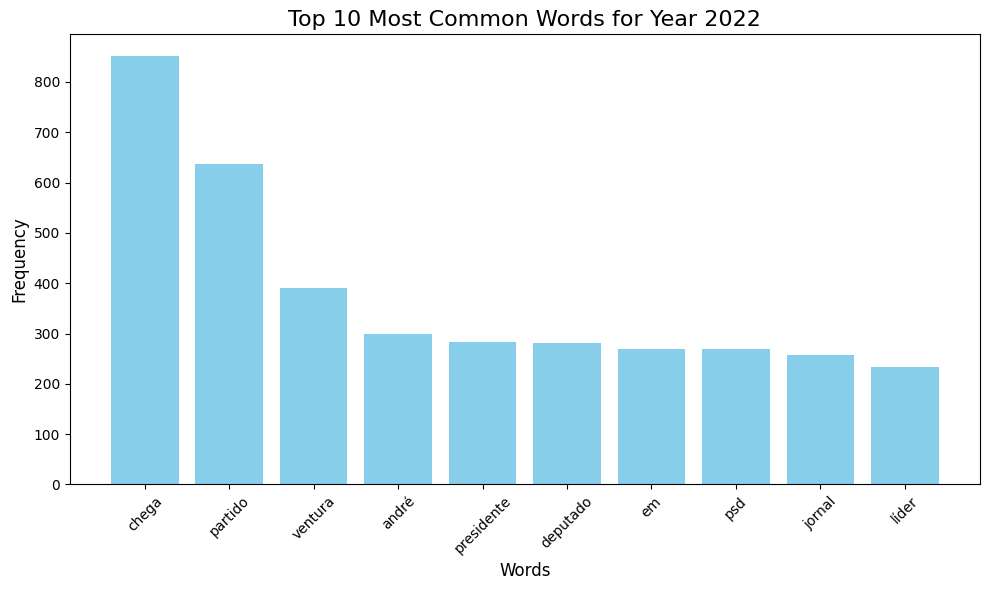

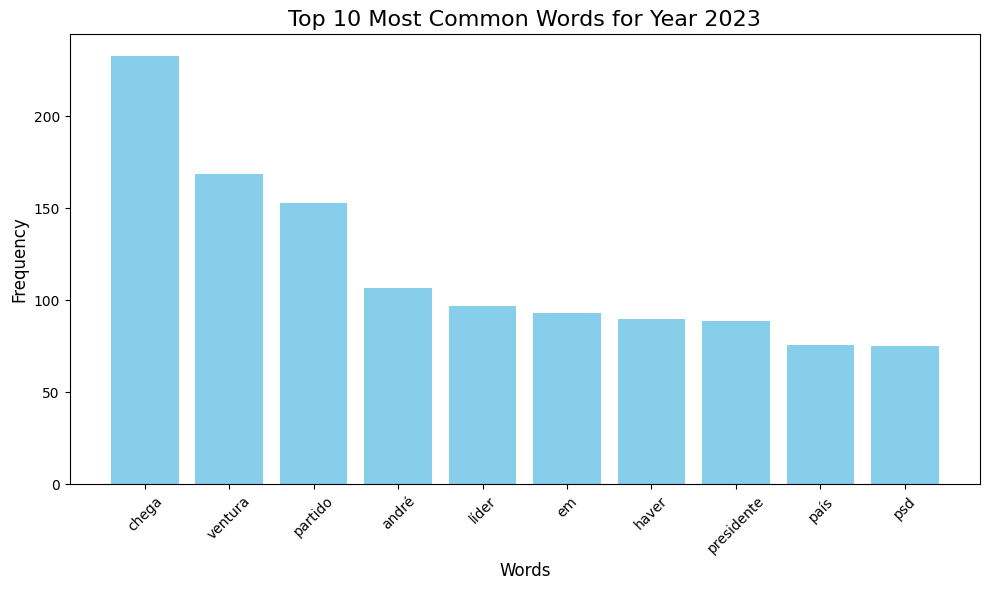

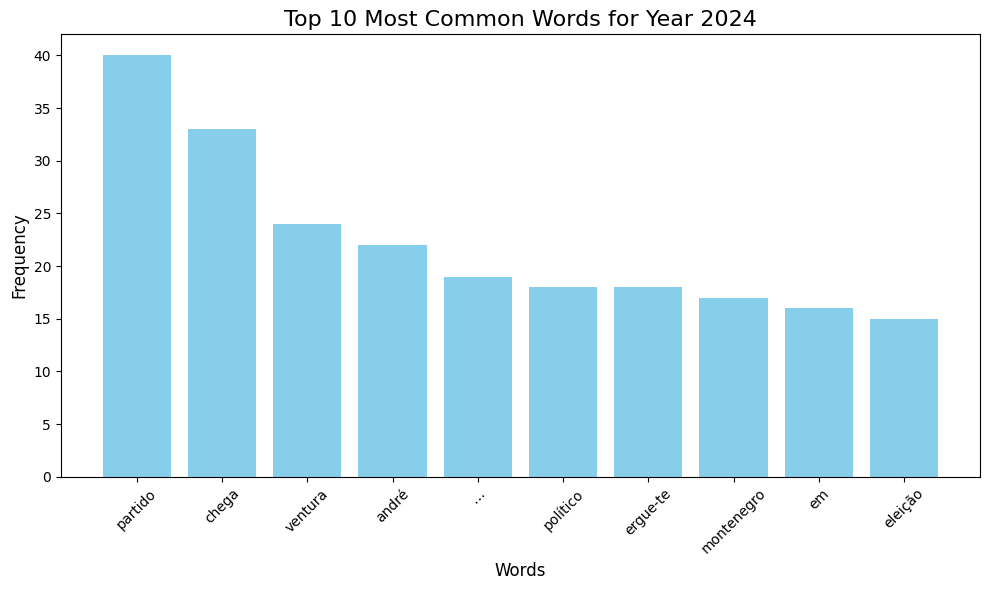

In [6]:
def plot_yearly_top_words(df, text_column='Lemma_String', timestamp_column='timestamp', top_n=10):
    """
    Generate bar plots of the top n most common words for each year in the DataFrame.
    
    Parameters:
        df (DataFrame): The pandas DataFrame containing the data.
        text_column (str): The column containing text data for analysis.
        timestamp_column (str): The column containing timestamps from which years are extracted.
        top_n (int): The number of top words to display for each year.
    """
    # Extract the year from the timestamp column
    df['year'] = df[timestamp_column].astype(str).str[:4]
    
    # Get unique years in the DataFrame
    unique_years = sorted(df['year'].unique())  # Ensure years are sorted
    
    # Loop through each year and generate the top words plot
    for year in unique_years:
        # Filter rows for the current year
        year_df = df[df['year'] == year]
        
        # Combine all text for current year in string
        combined_text = ' '.join(year_df[text_column].dropna())

        # Split the combined text into words
        all_words = combined_text.split()
        
        # Count the frequency of each word
        word_counts = Counter(all_words)
        
        # Get the top n most common words
        most_common_words = word_counts.most_common(top_n)
        words, frequencies = zip(*most_common_words)  # Unpack words and frequencies
        
        # Create filename for saving
        filename = f"/Users/hannes_seidl/Desktop/UA_Aveiro/WS24:25/FDS/FDS_project_pics/most_common_words_year_{year}"

        # Plot the top n most common words
        plt.figure(figsize=(10, 6))
        plt.bar(words, frequencies, color='skyblue')
        plt.title(f"Top {top_n} Most Common Words for Year {year}", fontsize=16)
        plt.xlabel("Words", fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(filename)
        plt.show()

# Example usage
# Assuming `df` is the DataFrame containing the timestamp and Lemma_String columns
plot_yearly_top_words(df, text_column='Lemma_String', timestamp_column='timestamp', top_n=10)

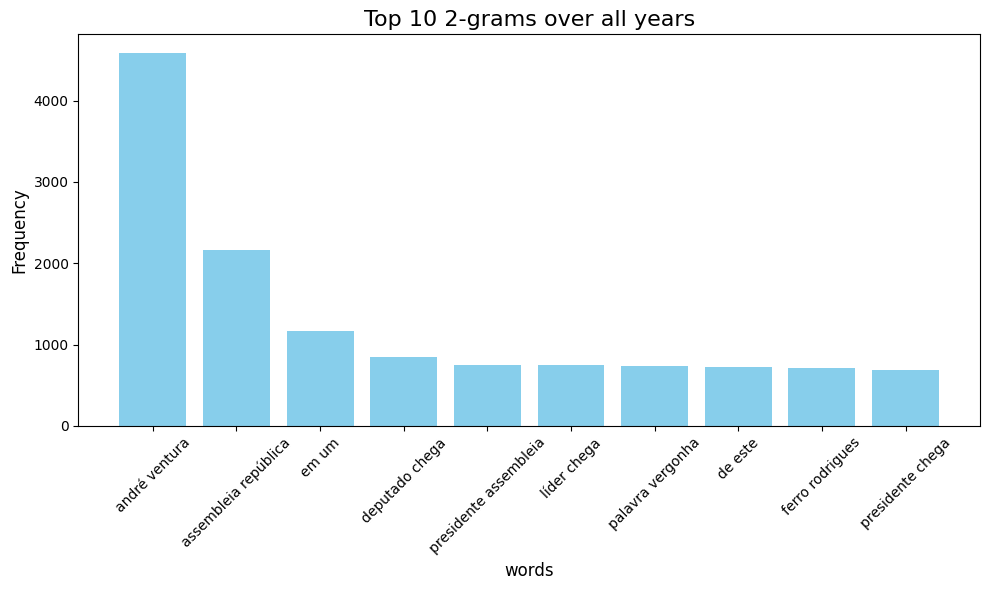

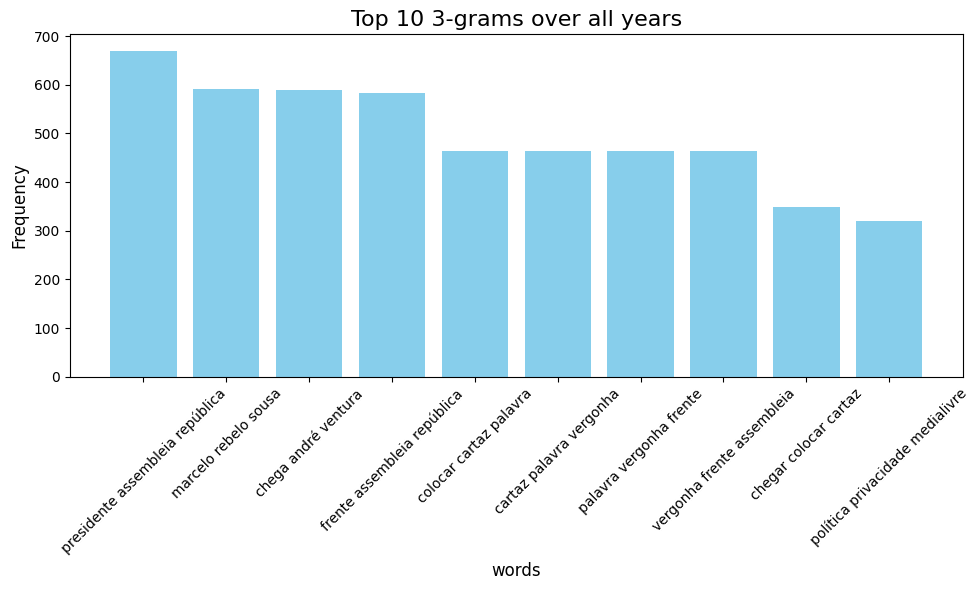

In [9]:
def plot_top_ngrams(text, ngram_range=(2, 2), top_n=10):
    """
    Generate n-grams from a combined text and plot the top n most common n-grams.
    
    Parameters:
        text (str): The combined text from which to generate n-grams.
        ngram_range (tuple): The range of n-grams to generate (e.g., (2, 2) for bigrams).
        top_n (int): The number of top n-grams to display.
    """
    # Create a CountVectorizer for the specified n-gram range
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    ngrams_matrix = vectorizer.fit_transform([text])  # Fit and transform the text
    
    # Count the occurrences of each n-gram
    ngrams_counts = ngrams_matrix.sum(axis=0)
    ngrams_freq = [(word, ngrams_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngrams_freq = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)[:top_n]  # Sort and get top n

    # Separate n-grams and their frequencies
    ngrams, frequencies = zip(*ngrams_freq)

    # Plot the top n most common n-grams
    plt.figure(figsize=(10, 6))
    plt.bar(ngrams, frequencies, color='skyblue')
    plt.title(f"Top {top_n} {ngram_range[0]}-grams over all years", fontsize=16)
    plt.xlabel("words", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'/Users/hannes_seidl/Desktop/UA_Aveiro/WS24:25/FDS/FDS_project_pics/top_10_{ngram_range[0]}_grams_all_years')
    plt.show()

plot_top_ngrams(combined_text, ngram_range=(2, 2), top_n=10) 
plot_top_ngrams(combined_text, ngram_range=(3, 3), top_n=10)

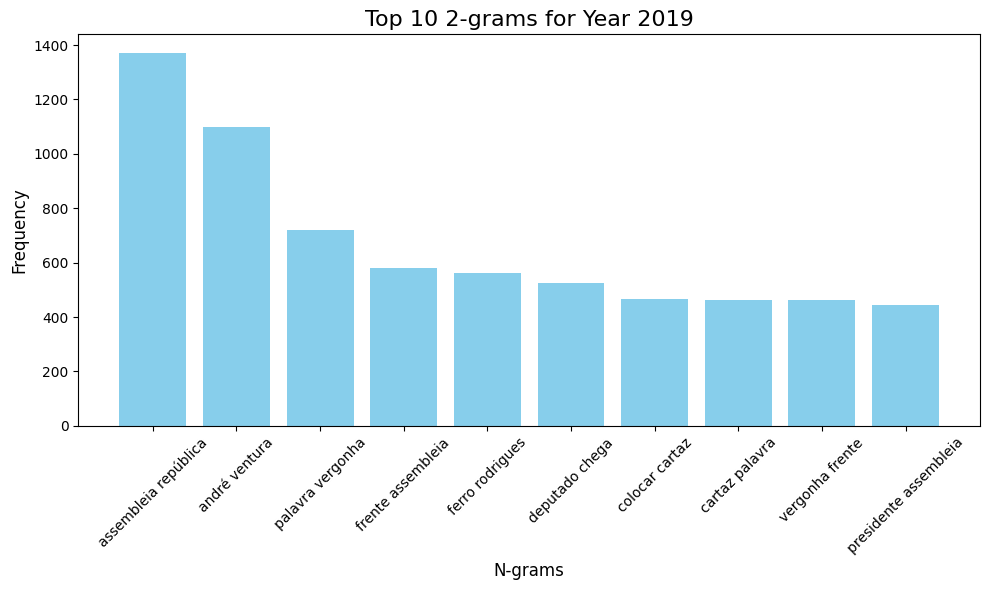

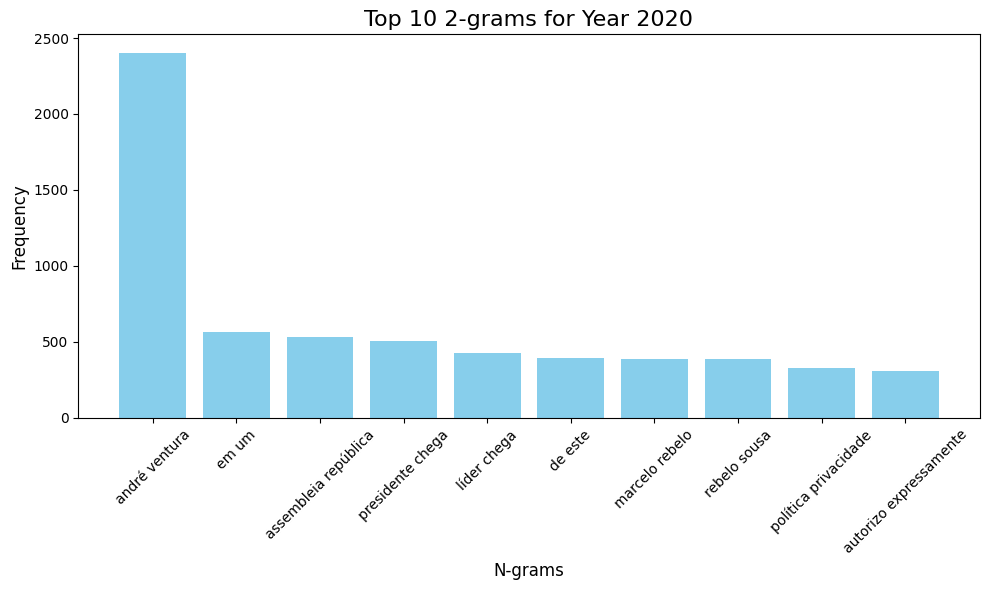

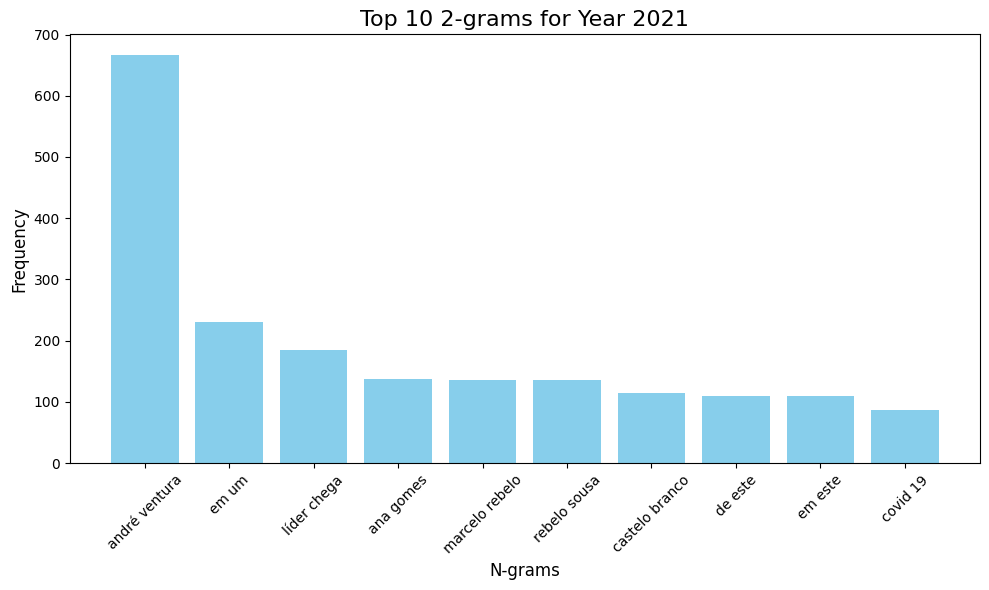

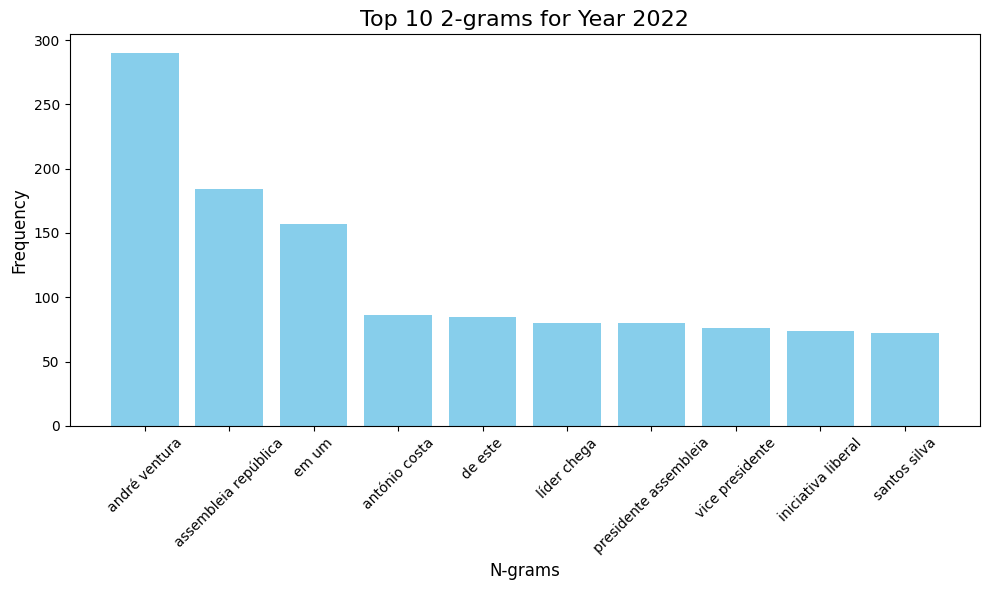

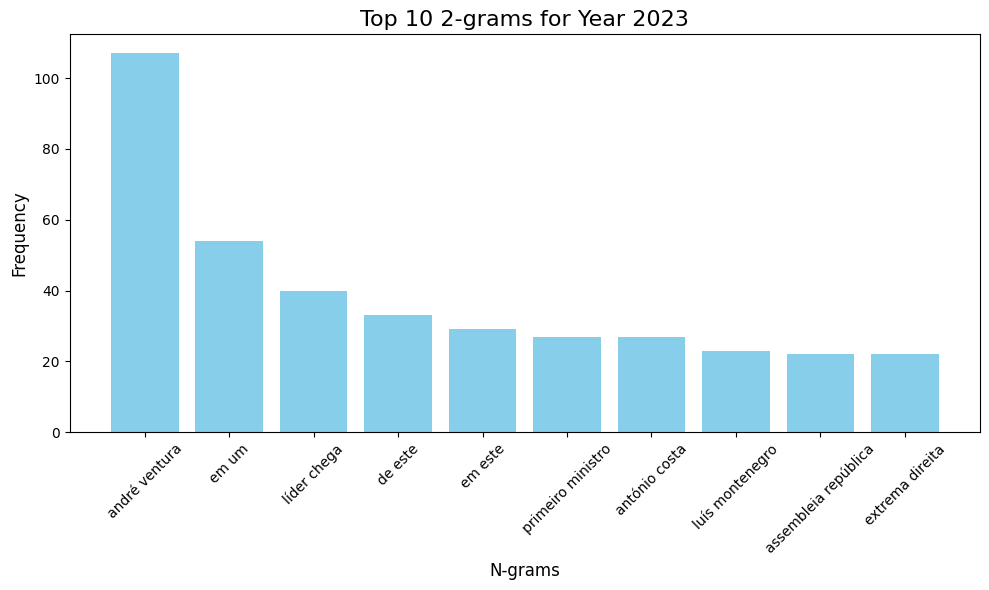

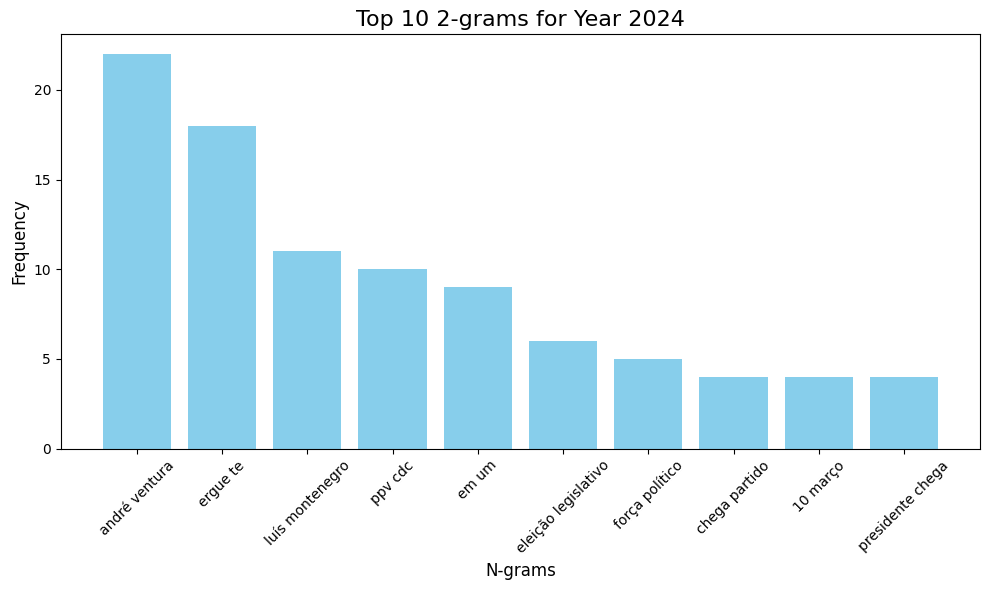

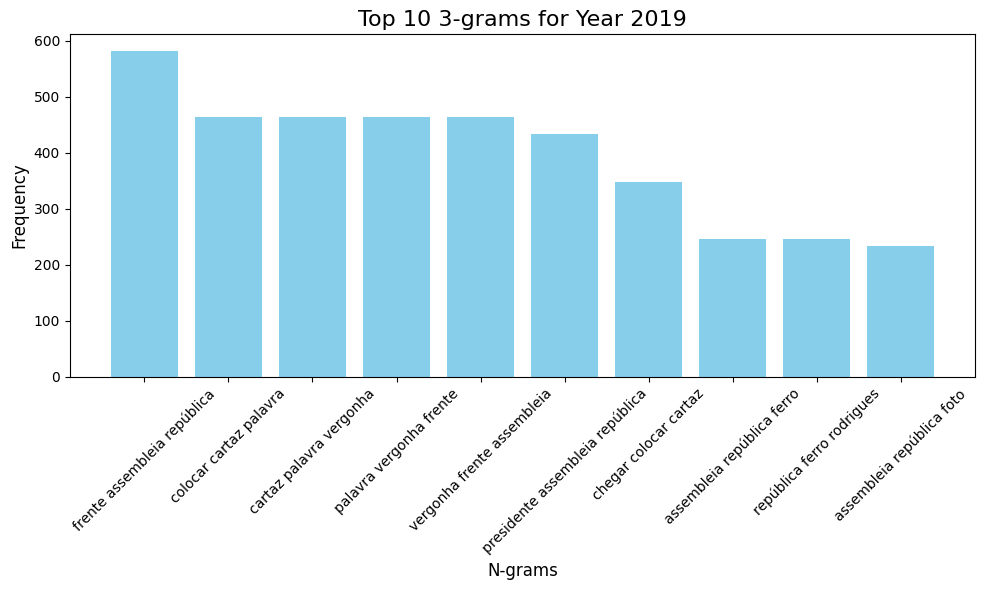

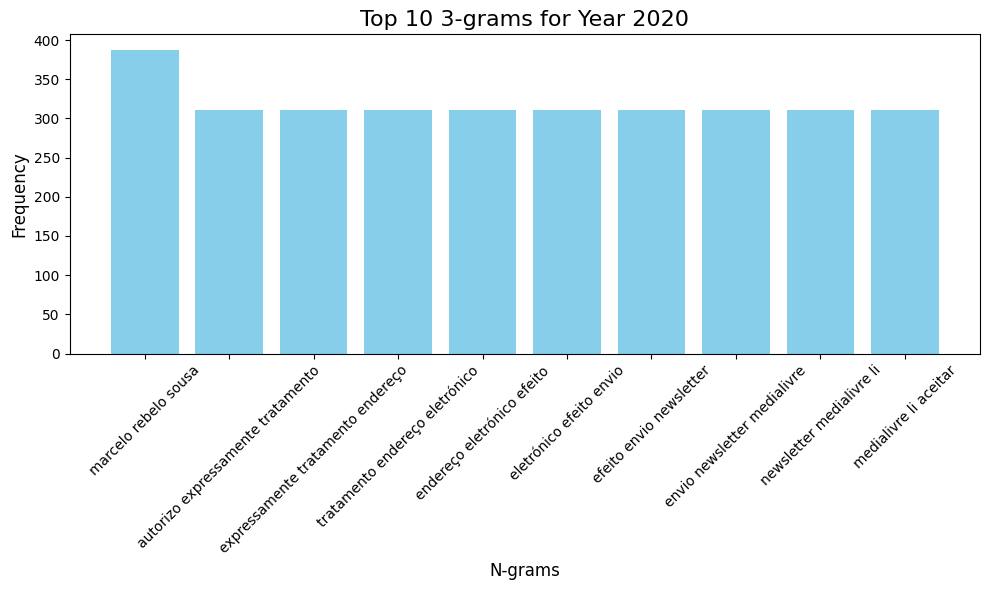

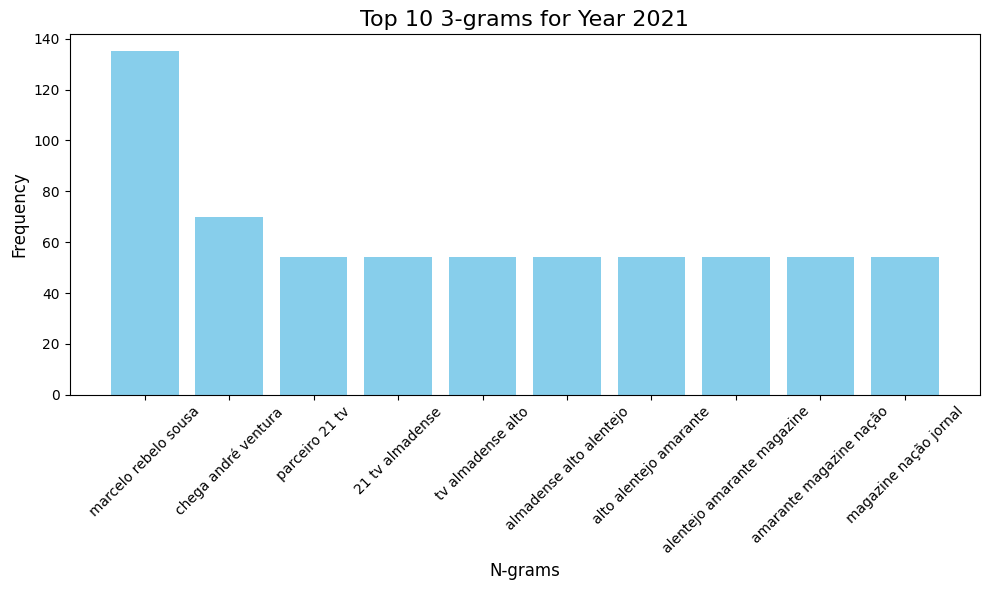

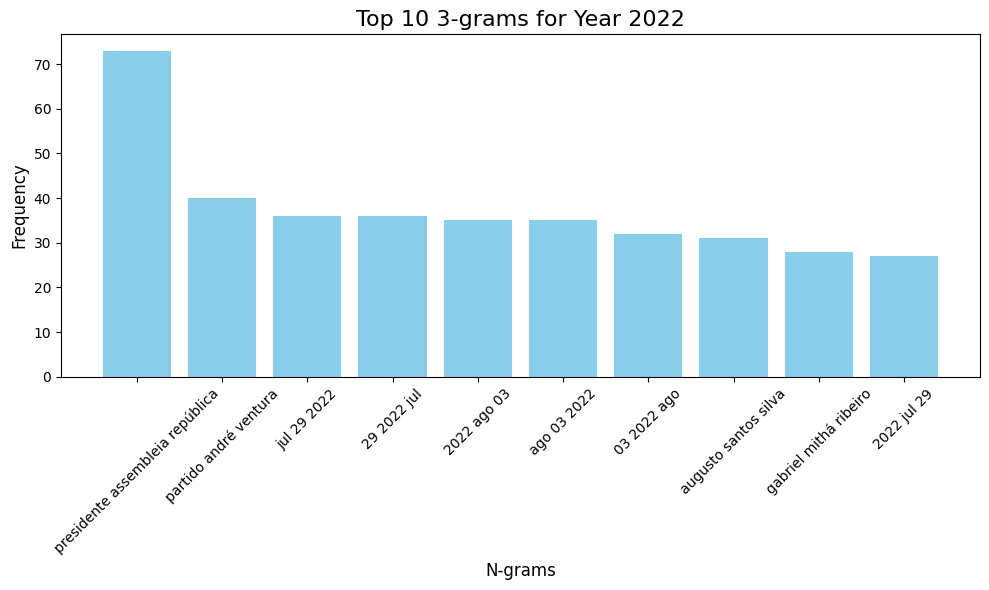

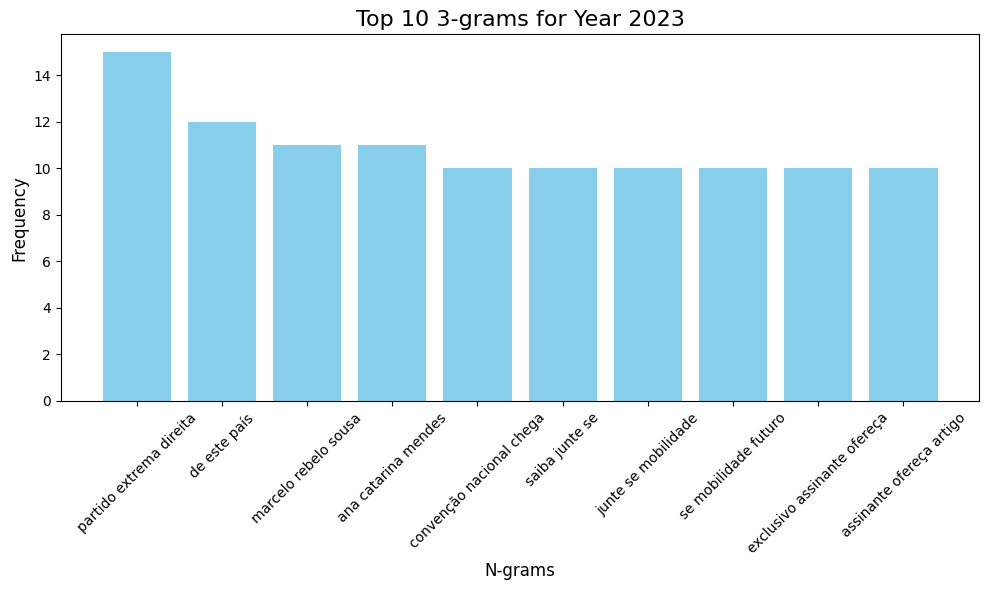

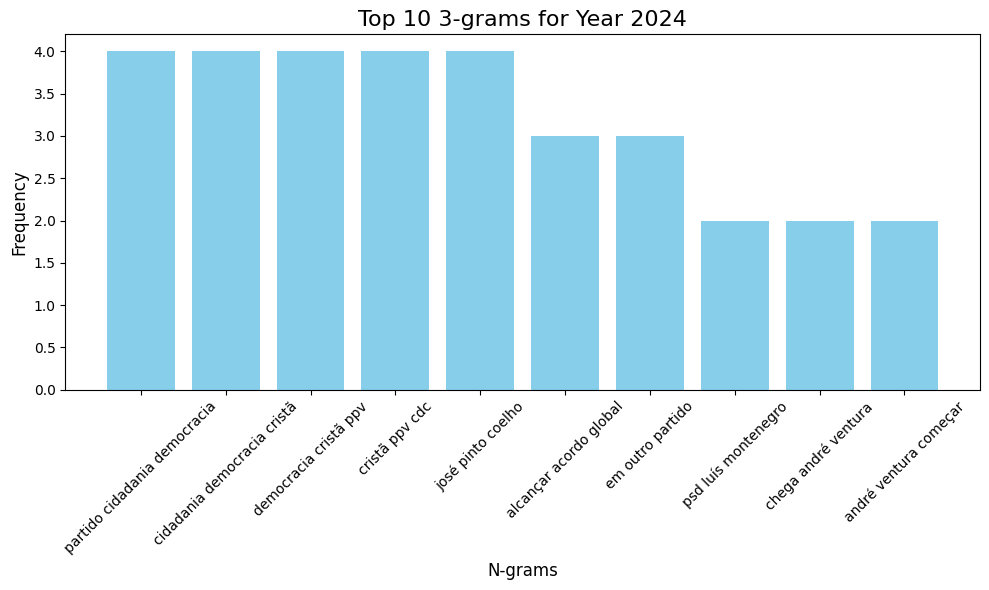

In [10]:
def plot_yearly_ngrams(df, text_column='Lemma_String', timestamp_column='timestamp', ngram_range=(2, 2), top_n=10):
    """
    Generate n-grams from the text column for each year in the DataFrame
    and plot the top n most common n-grams for each year.
    
    Parameters:
        df (DataFrame): The pandas DataFrame containing the data.
        text_column (str): The column containing text data for analysis.
        timestamp_column (str): The column containing timestamps from which years are extracted.
        ngram_range (tuple): The range of n-grams to generate (e.g., (2, 2) for bigrams).
        top_n (int): The number of top n-grams to display for each year.
    """
    # Extract the year from the timestamp column
    df['year'] = df[timestamp_column].astype(str).str[:4]
    
    # Get unique years in the DataFrame
    unique_years = sorted(df['year'].unique())  # Ensure years are sorted
    
    # Loop through each year and generate the top n-grams plot
    for year in unique_years:
        # Filter rows for the current year
        year_df = df[df['year'] == year]
        
        # Combine all text for current year in string
        combined_text = ' '.join(year_df[text_column].dropna())

        # Create a CountVectorizer for the specified n-gram range
        vectorizer = CountVectorizer(ngram_range=ngram_range)
        ngrams_matrix = vectorizer.fit_transform([combined_text])  # Fit and transform the text
        
        # Count the occurrences of each n-gram
        ngrams_counts = ngrams_matrix.sum(axis=0)
        ngrams_freq = [(word, ngrams_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
        ngrams_freq = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)[:top_n]  # Sort and get top n

        # Create filename for saving
        filename = f"/Users/hannes_seidl/Desktop/UA_Aveiro/WS24:25/FDS/FDS_project_pics/top_10_{ngram_range[0]}-grams_year_{year}"

        # Separate n-grams and their frequencies
        if ngrams_freq:  # Check if there are any n-grams
            ngrams, frequencies = zip(*ngrams_freq)

            # Plot the top n most common n-grams
            plt.figure(figsize=(10, 6))
            plt.bar(ngrams, frequencies, color='skyblue')
            plt.title(f"Top {top_n} {ngram_range[0]}-grams for Year {year}", fontsize=16)
            plt.xlabel("N-grams", fontsize=12)
            plt.ylabel("Frequency", fontsize=12)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.savefig(filename)
            plt.show()
        else:
            print(f"No {ngram_range[0]}-grams found for year {year}.")

# Example usage
# Assuming `df` is the DataFrame containing the timestamp and Lemma_String columns
plot_yearly_ngrams(df, text_column='Lemma_String', timestamp_column='timestamp', ngram_range=(2, 2), top_n=10)  # Bigrams
plot_yearly_ngrams(df, text_column='Lemma_String', timestamp_column='timestamp', ngram_range=(3, 3), top_n=10)  # Trigrams